In [181]:
import numpy as np
import utils
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [5]:
# Dice score calculation for 3D arrays, predicted and ground truth
def dice_score(array1, array2):
    intersection = np.sum(array1 * array2)
    union = np.sum(array1) + np.sum(array2)
    dice = (2 * intersection) / union
    if union == 0:
        return 1.0
    return dice

In [6]:
# IoU calculation
def iou_score(array1, array2):
    intersection = np.sum(array1 * array2)
    union = np.sum(np.logical_or(array1, array2))
    iou = intersection / union
    if union == 0:
        return 1.0
    else:
        return iou


# BTCV Data Quantification

In [7]:
# BTCV Data
# image = utils.padtocube(utils.load3dmatrix('images/vol_16'))
mask = utils.padtocube(utils.load_mrc('outputs/vol_14_kidneys_mask.mrc'))
label = utils.padtocube(utils.load3dmatrix('images/label_14'))

# lungs
# label = np.where(np.abs(label-154) < 2, 1, 0)

# liver
# label = np.where(np.abs(label-51) < 2, 1, 0)

# kidneys
# label = np.where(np.abs(label-204) < 2, 1, 0)


In [215]:
# Liver
dice_lungs = []
iou_lungs = []
dice_liver = []
iou_liver = []
dice_kidneys = []
iou_kidneys = []
target_list = ['lungs', 'kidneys', 'liver']

for x in range(16):
    for t in target_list:
        mask = utils.padtocube(utils.load_mrc('outputs/vol_%d_%s_mask.mrc' % ((x + 2), t)))
        label = utils.padtocube(utils.load3dmatrix('images/label_%d' % (x + 2)))
        # lungs
        if t == 'lungs':
            # labels are of different color for case 3
            if x == 1:
                label_organ = np.where(np.abs(label-149) < 2, 1, 0)
            else: 
                label_organ = np.where(np.abs(label-154) < 2, 1, 0) 
            dice_sc = dice_score(mask, label_organ)
            iou_sc = iou_score(mask, label_organ)
            dice_lungs.append(dice_sc)
            iou_lungs.append(iou_sc)
        # kidneys
        elif t == 'kidneys':
            if x == 1:
                label_organ = np.where(np.abs(label- 201) < 2, 1, 0)
            else: 
                label_organ = np.where(np.abs(label - 204) < 2, 1, 0)
            dice_sc = dice_score(mask, label_organ)
            iou_sc = iou_score(mask, label_organ)
            dice_kidneys.append(dice_sc)
            iou_kidneys.append(iou_sc)
        # liver
        else:
            if x == 1:
                label_organ = np.where(np.abs(label- 47) < 2, 1, 0)
            else: 
                label_organ = np.where(np.abs(label - 51) < 2, 1, 0)
            
            dice_sc = dice_score(mask, label_organ)
            iou_sc = iou_score(mask, label_organ)
            dice_liver.append(dice_sc)
            iou_liver.append(iou_sc)


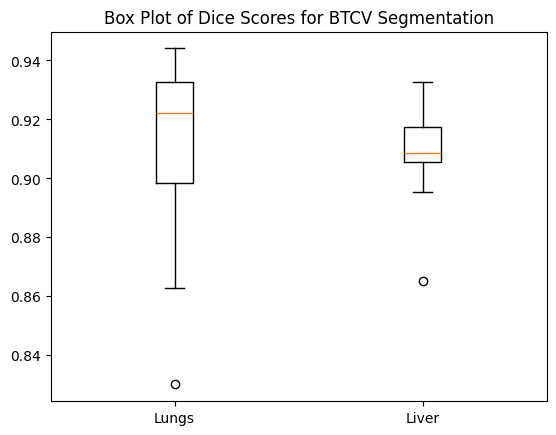

In [89]:
dices = [dice_lungs, dice_liver]
plt.boxplot(dices)
plt.title("Box Plot of Dice Scores for BTCV Segmentation")
plt.xticks([1, 2], ['Lungs', 'Liver'])
plt.show()

/tmp/ipykernel_11990/3375003848.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax[0], x = 'Target', y = 'Dice Score', data = df_dice, errorbar = 'sd', edgecolor='dimgray', errcolor='dimgray', linewidth=1.5, width=0.4, palette = 'YlGnBu_r')
/tmp/ipykernel_11990/3375003848.py:7: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': 'dimgray'}` instead.

  sns.barplot(ax=ax[0], x = 'Target', y = 'Dice Score', data = df_dice, errorbar = 'sd', edgecolor='dimgray', errcolor='dimgray', linewidth=1.5, width=0.4, palette = 'YlGnBu_r')
/tmp/ipykernel_11990/3375003848.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax[1], x = '

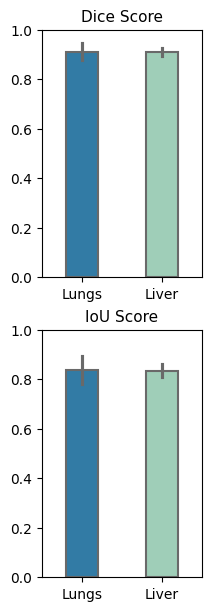

In [317]:
fig, ax = plt.subplots(2,1, figsize=(2,6), constrained_layout=True)
data_tuples = [('Lungs', i) for i in dice_lungs] + [('Liver', j) for j in dice_liver]
df_dice = pd.DataFrame(data_tuples, columns = ['Target', 'Dice Score'])
data_tuples_i = [('Lungs', i) for i in iou_lungs] + [('Liver', j) for j in iou_liver]
df_iou = pd.DataFrame(data_tuples_i, columns = ['Target', 'IoU Score'])
# palette = sns.cubehelix_palette(5, start = 0.1, rot = -0.8, dark = 0.2, light = 0.6, hue = 1, gamma = 2, reverse = False, as_cmap = False)
sns.barplot(ax=ax[0], x = 'Target', y = 'Dice Score', data = df_dice, errorbar = 'sd', edgecolor='dimgray', errcolor='dimgray', linewidth=1.5, width=0.4, palette = 'YlGnBu_r')
sns.barplot(ax=ax[1], x = 'Target', y = 'IoU Score', data = df_iou, errorbar = 'sd', edgecolor='dimgray', errcolor='dimgray', linewidth=1.5, width=0.4, palette = 'YlGnBu_r')

ax[0].set_ylim(0,1)
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].set_title('Dice Score', fontsize = 11)

ax[1].set_ylim(0,1)
ax[1].set_ylabel('')
ax[1].set_xlabel('')
ax[1].set_title('IoU Score', fontsize = 11)

plt.show()

In [ ]:
f, ax = plt.subplots(1,2, figsize=(3,3), constrained_layout = True)
sns.catplot(x = 'Target', y = 'Dice Score', kind = 'bar', data = df, errorbar = 'sd', palette = palette)


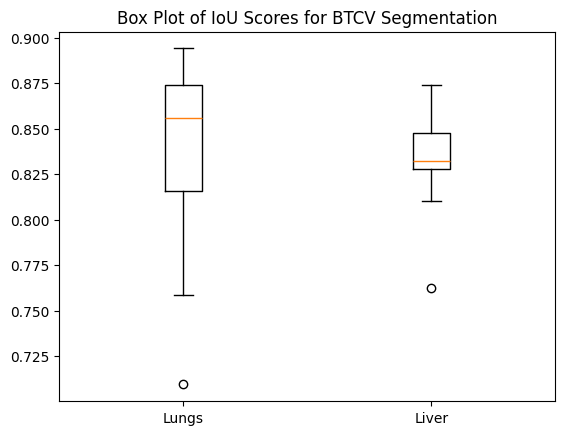

In [92]:
ious = [iou_lungs, iou_liver]
plt.boxplot(ious)
plt.title("Box Plot of IoU Scores for BTCV Segmentation")
plt.xticks([1, 2], ['Lungs', 'Liver'])
plt.show()

In [ ]:
# plot dice scores for lungs
# dice_lung_mean = np.mean(dice_lung)
# dice_lung_std = np.std(dice_lung)
# iou_lung_mean = np.mean(iou_lung)
# iou_lung_std = np.std(iou_lung)

# # plot dice score for lungs
# plt.plot(dice_lung, 'o', label = 'Data points')
# plt.axhline(y = dice_lung_mean, color = 'r', linestyle = '-')
# plt.axhline(y = dice_lung_mean - dice_lung_std, color = 'g', linestyle = '--')
# plt.axhline(y = dice_lung_mean + dice_lung_std, color = 'g', linestyle = '--')
# plt.title("Dice Score for Lungs")
# plt.show()

In [ ]:

# # plot IoU score for lungs
# plt.plot(iou_lung, 'o', label = 'Data points')
# plt.axhline(y = iou_lung_mean, color = 'r', linestyle = '-')
# plt.axhline(y = iou_lung_mean - iou_lung_std, color = 'g', linestyle = '--')
# plt.axhline(y = iou_lung_mean + iou_lung_std, color = 'g', linestyle = '--')
# plt.title("IoU Score for Lungs")
# plt.show()

In [ ]:
mask3 = utils.padtocube(utils.load_mrc('outputs/vol_14_kidneys_mask.mrc'))
label3 = utils.padtocube(utils.load3dmatrix('images/label_14'))
plt.imshow(mask3[:,160,:])

In [ ]:
plt.imshow(np.where(np.abs(label3-205) < 2, 1, 0)[:,160,:])

# BRaTS Data Quantification

In [166]:
# BRaTS Data
mask = utils.padtocube(utils.load_mrc('outputs/brats2021_00204_flair_tr_mask.mrc'))
label = utils.padtocube(utils.load3dmatrix('images/BraTS2021_00204_seg'))

In [106]:
# tumor region label
label_tr = np.where(label>0, 1, 0)
# tumor label
label_t = np.where(np.where(label == 51, 1, 0) + np.where(label == 205, 1, 0), 1,0)

In [292]:
flair_t_dice = []
flair_tr_dice = []
t1ce_t_dice = []
t1ce_tr_dice = []
t2_t_dice = []
t2_tr_dice = []
t1_t_dice = []
t1_tr_dice = []

flair_t_iou = []
flair_tr_iou = []
t1ce_t_iou = []
t1ce_tr_iou = []
t2_t_iou = []
t2_tr_iou = []
t1_t_iou = []
t1_tr_iou = []

image_list = ['00201', '00204', '00207', '00209', '00210', '00211', '00216', '00217']
categories = ['flair', 't1ce', 't2', 't1']
regions = ['tr', 'tumor']

for im in image_list:
    for c in categories:
        for region in regions: 
            mask = utils.padtocube(utils.load_mrc('outputs/brats2021_%s_%s_%s_mask.mrc' %(im, c, region)))
            label = utils.padtocube(utils.load3dmatrix('images/BraTS2021_%s_seg' % im))
            # tumor region
            if region == 'tr':
                label_tr =  np.where(label > 0, 1, 0)
                dice_s_tr = dice_score(mask, label_tr)
                iou_s_tr = iou_score(mask, label_tr)

                if c == 'flair':
                    flair_tr_dice.append(dice_s_tr)
                    flair_tr_iou.append(iou_s_tr)
                elif c == 't1ce':
                    t1ce_tr_dice.append(dice_s_tr)
                    t1ce_tr_iou.append(iou_s_tr)
                elif c == 't2':
                    t2_tr_dice.append(dice_s_tr)
                    t2_tr_iou.append(iou_s_tr)
                else: 
                    t1_tr_dice.append(dice_s_tr)
                    t1_tr_iou.append(iou_s_tr)

            # tumor region
            else:
                label_t =  np.where(np.where(label == 51, 1, 0) + np.where(label == 205, 1, 0), 1,0)
                dice_s_t = dice_score(mask, label_t)
                iou_s_t = iou_score(mask, label_t)

                if c == 'flair':
                    flair_t_dice.append(dice_s_t)
                    flair_t_iou.append(iou_s_t)
                elif c == 't1ce':
                    t1ce_t_dice.append(dice_s_t)
                    t1ce_t_iou.append(iou_s_t)
                elif c == 't2':
                    t2_t_dice.append(dice_s_t)
                    t2_t_iou.append(iou_s_t)
                else: 
                    t1_t_dice.append(dice_s_t)
                    t1_t_iou.append(iou_s_t)
              

In [295]:
# subplot 1 data: four contrasts, tumor, dice score
data_t_dice = [('flair', i) for i in flair_t_dice] + [('t1ce', j) for j in t1ce_t_dice] + [('t2', k) for k in t2_t_dice] + [('t1', v) for v in t1_t_dice]
df_t_dice = pd.DataFrame(data_t_dice, columns = ['Contrast', 'Dice Score'])

# subplot 2 data: four contrasts, tumor, iou score
data_t_iou = [('flair', i) for i in flair_t_iou] + [('t1ce', j) for j in t1ce_t_iou] + [('t2', k) for k in t2_t_iou] + [('t1', v) for v in t1_t_iou]
df_t_iou = pd.DataFrame(data_t_iou, columns = ['Contrast', 'IoU Score'])

# subplot 3 data: four contrasts, tumor region, dice score
data_tr_dice = [('flair', i) for i in flair_tr_dice] + [('t1ce', j) for j in t1ce_tr_dice] + [('t2', k) for k in t2_tr_dice] + [('t1', v) for v in t1_tr_dice]
df_tr_dice = pd.DataFrame(data_tr_dice, columns = ['Contrast', 'Dice Score'])

# subplot 4 data: four contrasts, tumor region, iou score
data_tr_iou = [('flair', i) for i in flair_tr_iou] + [('t1ce', j) for j in t1ce_tr_iou] + [('t2', k) for k in t2_tr_iou] + [('t1', v) for v in t1_tr_iou]
df_tr_iou = pd.DataFrame(data_tr_iou, columns = ['Contrast', 'IoU Score'])


/tmp/ipykernel_11990/3518213901.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax[0][0], x = 'Contrast', y = 'Dice Score', data = df_t_dice, errorbar = 'sd', edgecolor='dimgray', errcolor='dimgray', linewidth=1.5, width=0.4, palette = 'YlGnBu_r')
/tmp/ipykernel_11990/3518213901.py:2: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': 'dimgray'}` instead.

  sns.barplot(ax=ax[0][0], x = 'Contrast', y = 'Dice Score', data = df_t_dice, errorbar = 'sd', edgecolor='dimgray', errcolor='dimgray', linewidth=1.5, width=0.4, palette = 'YlGnBu_r')
/tmp/ipykernel_11990/3518213901.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(a

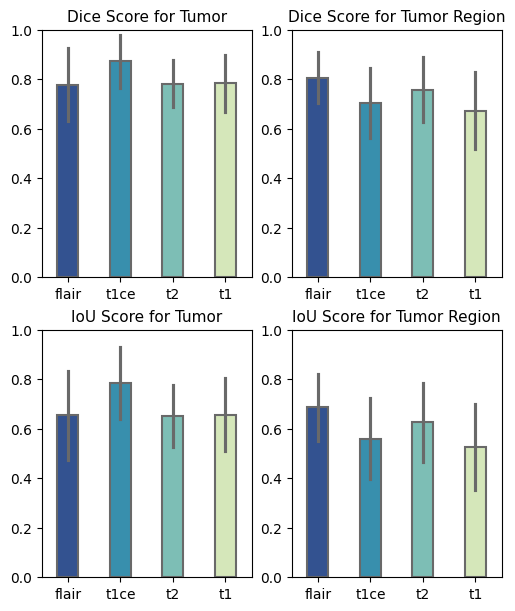

In [320]:
fig, ax = plt.subplots(2,2, figsize=(5, 6), constrained_layout=True)
sns.barplot(ax=ax[0][0], x = 'Contrast', y = 'Dice Score', data = df_t_dice, errorbar = 'sd', edgecolor='dimgray', errcolor='dimgray', linewidth=1.5, width=0.4, palette = 'YlGnBu_r')
sns.barplot(ax=ax[1][0], x = 'Contrast', y = 'IoU Score', data = df_t_iou, errorbar = 'sd', edgecolor='dimgray', errcolor='dimgray', linewidth=1.5, width=0.4, palette = 'YlGnBu_r')
sns.barplot(ax=ax[0][1], x = 'Contrast', y = 'Dice Score', data = df_tr_dice, errorbar = 'sd', edgecolor='dimgray', errcolor='dimgray', linewidth=1.5, width=0.4, palette = 'YlGnBu_r')
sns.barplot(ax=ax[1][1], x = 'Contrast', y = 'IoU Score', data = df_tr_iou, errorbar = 'sd', edgecolor='dimgray', errcolor='dimgray', linewidth=1.5, width=0.4, palette = 'YlGnBu_r')


ax[0][0].set_ylim(0,1)
ax[0][0].set_ylabel('')
ax[0][0].set_xlabel('')
ax[0][0].set_title('Dice Score for Tumor', fontsize = 11)

ax[0][1].set_ylim(0,1)
ax[0][1].set_ylabel('')
ax[0][1].set_xlabel('')
ax[0][1].set_title('Dice Score for Tumor Region', fontsize = 11)

ax[1][0].set_ylim(0,1)
ax[1][0].set_ylabel('')
ax[1][0].set_xlabel('')
ax[1][0].set_title('IoU Score for Tumor', fontsize = 11)

ax[1][1].set_ylim(0,1)
ax[1][1].set_ylabel('')
ax[1][1].set_xlabel('')
ax[1][1].set_title('IoU Score for Tumor Region', fontsize = 11)

plt.show()

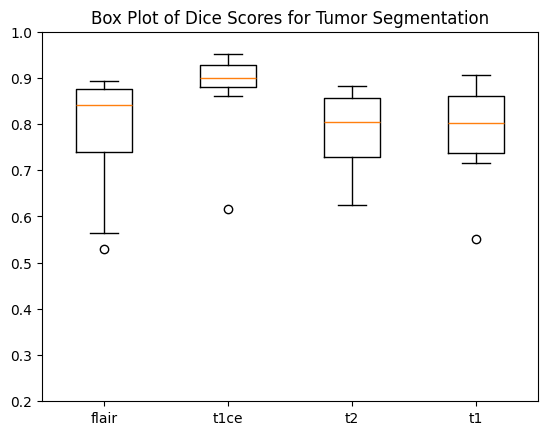

In [177]:
dices_t = [flair_t_dice, t1ce_t_dice, t2_t_dice, t1_t_dice]

plt.boxplot(dices_t)
plt.title("Box Plot of Dice Scores for Tumor Segmentation")
plt.xticks([1, 2, 3, 4], ['flair', 't1ce', 't2', 't1'])
plt.ylim(0.2, 1.0)
plt.show()

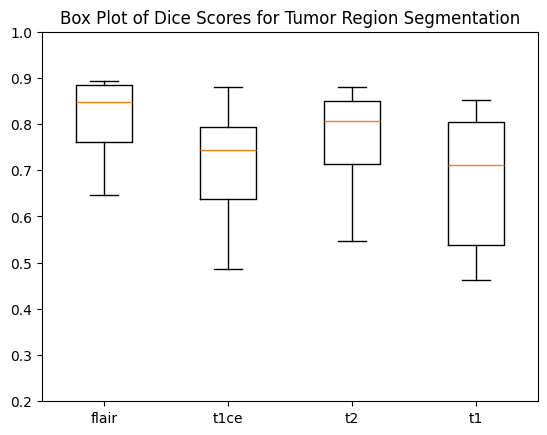

In [176]:
dices_tr = [flair_tr_dice, t1ce_tr_dice, t2_tr_dice, t1_tr_dice]

plt.boxplot(dices_tr)
plt.title("Box Plot of Dice Scores for Tumor Region Segmentation")
plt.xticks([1, 2, 3, 4], ['flair', 't1ce', 't2', 't1'])
plt.ylim(0.2, 1.0)
plt.show()

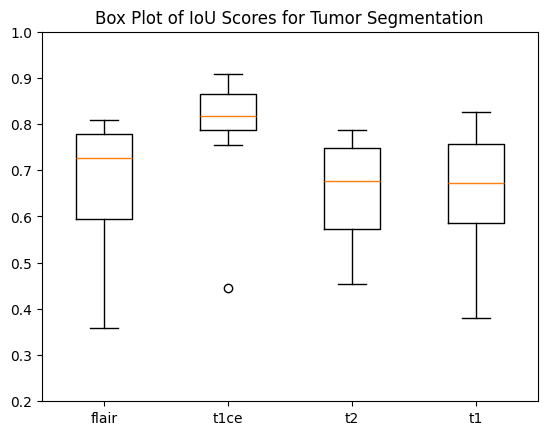

In [175]:
ious_t = [flair_t_iou, t1ce_t_iou, t2_t_iou, t1_t_iou]

plt.boxplot(ious_t)
plt.title("Box Plot of IoU Scores for Tumor Segmentation")
plt.xticks([1, 2, 3, 4], ['flair', 't1ce', 't2', 't1'])
plt.ylim(0.2, 1.0)
plt.show()

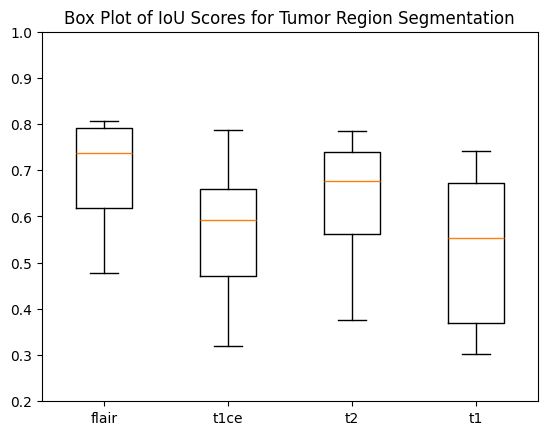

In [174]:
ious_tr = [flair_tr_iou, t1ce_tr_iou, t2_tr_iou, t1_tr_iou]

plt.boxplot(ious_tr)
plt.title("Box Plot of IoU Scores for Tumor Region Segmentation")
plt.xticks([1, 2, 3, 4], ['flair', 't1ce', 't2', 't1'])
plt.ylim(0.2, 1.0)
plt.show()

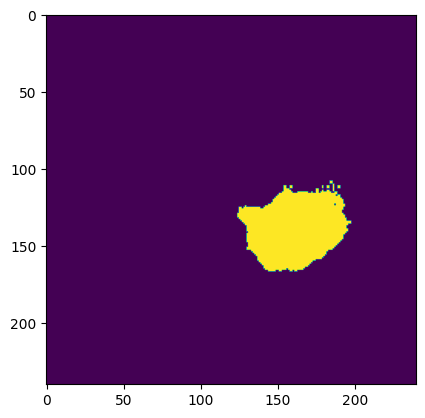

In [107]:
plt.imshow(mask[:,:,160])

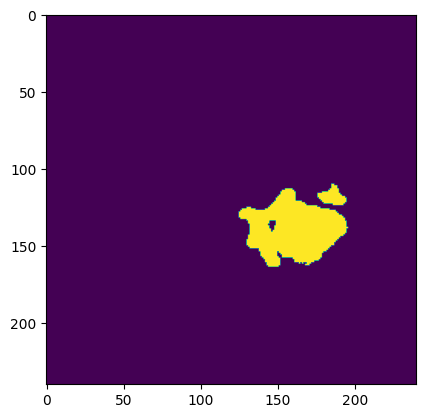

In [108]:
plt.imshow(label_tr[:,:,160])

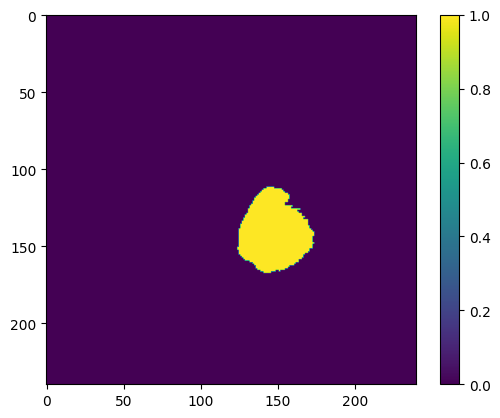

In [135]:
plt.imshow(label[:,170,:])
plt.colorbar()

In [123]:
np.unique(label)

array([  0,  51, 102, 205], dtype=uint8)

In [ ]:
label = utils.padtocube(utils.load3dmatrix('images/label_14'))
plt.imshow(label[:,160,:])
plt.colorbar()

In [ ]:
plt.hist(label.flatten(), bins=256)
plt.yscale('log')